In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r"data.csv",header=0)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.drop('id',axis = 1,inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
features_mean = list(data.columns[1:11])
featurs_se = list(data.columns[11:21])
featurs_worst = list(data.columns[21:31])
print(features_mean)
print("-----------------------------------------------------------------------------------------------------------")
print(featurs_se)
print("-----------------------------------------------------------------------------------------------------------")
print(featurs_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------------------------------------------------------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
-----------------------------------------------------------------------------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<Axes: xlabel='diagnosis', ylabel='count'>

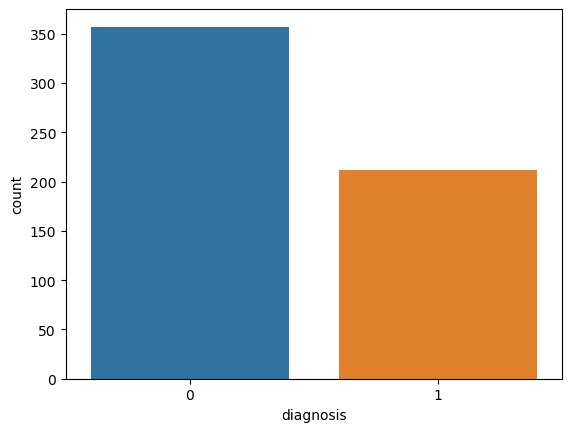

In [7]:
sns.countplot(x="diagnosis",data=data)

<Axes: >

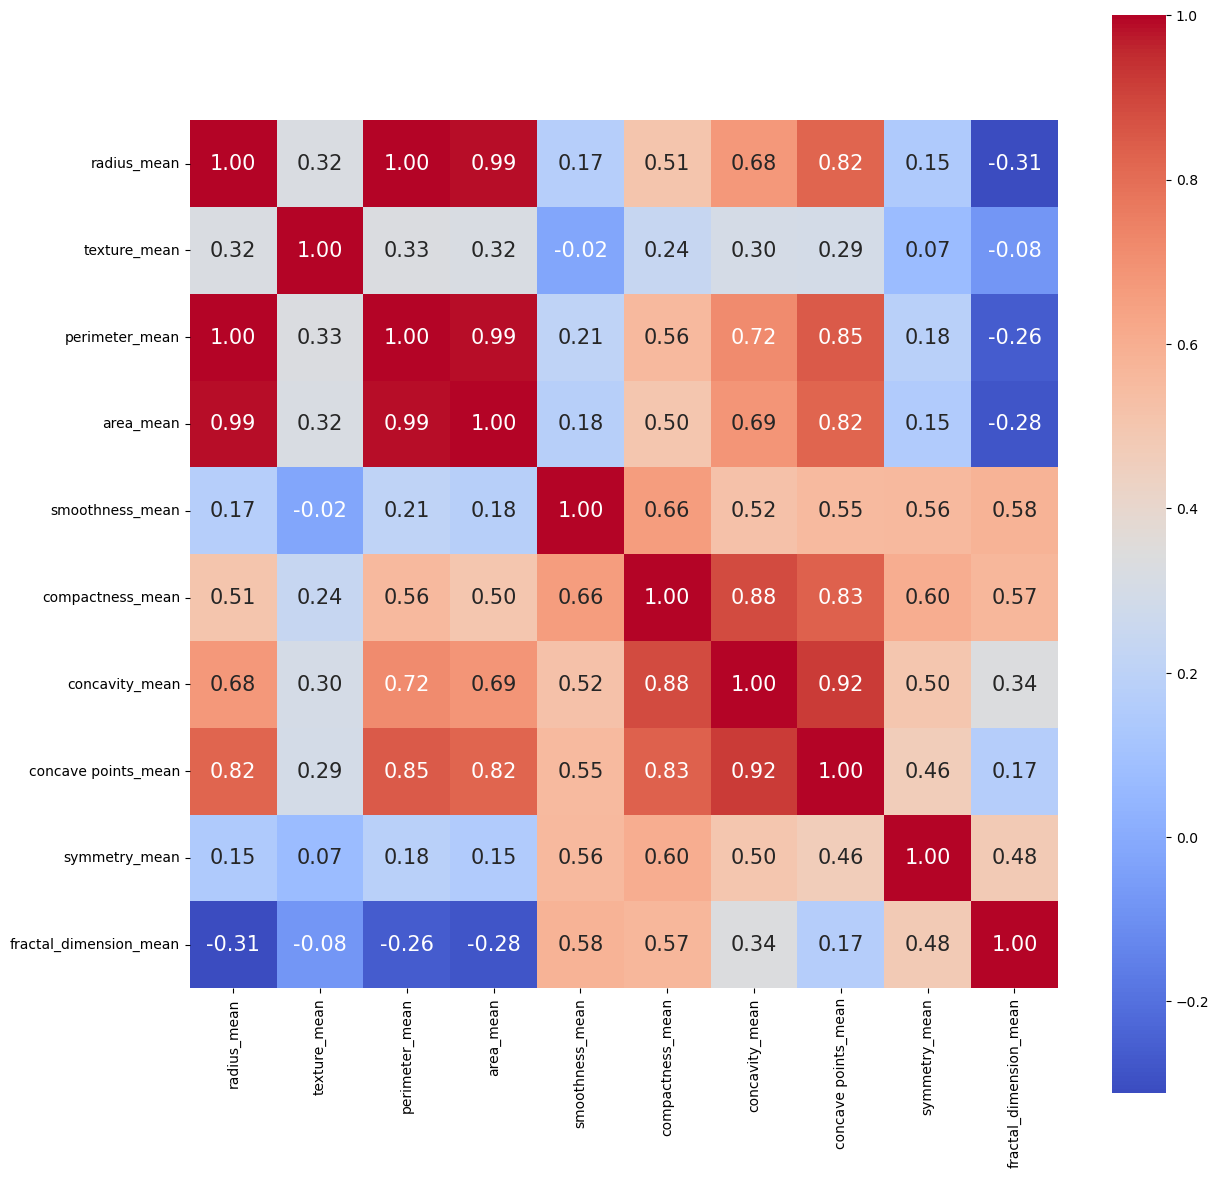

In [8]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')


In [9]:
feature_remain = ['radius_mean','texture_mean','smoothness_mean',
                  'compactness_mean','symmetry_mean','fractal_dimension_mean']

In [10]:
train, test = train_test_split(data, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [11]:
train_x = train[feature_remain]
train_y = train.diagnosis
test_x = test[feature_remain]
test_y = test.diagnosis


In [12]:
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.fit_transform(test_x)


In [13]:
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    model= svm.SVC(kernel = kernel).fit(train_x,train_y)
    validation = model.predict(test_x)
    print(kernel,' acc: ', metrics.accuracy_score(validation, test_y))

linear  acc:  0.9181286549707602
poly  acc:  0.9239766081871345
rbf  acc:  0.9473684210526315
sigmoid  acc:  0.8128654970760234


In [14]:
model = svm.SVC(kernel="rbf")
model.fit(train_x,train_y)
prediction = model.predict(test_x)
confusion_matrix(test_y, prediction)

array([[109,   8],
       [  1,  53]], dtype=int64)

In [15]:
param_grid = {'C':[0.1,1,10,100,1000]}
grid_model = GridSearchCV(svm.SVC(), param_grid, verbose=3)
grid_model.fit(train_x, train_y)
print(grid_model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.950 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.887 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.938 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.924 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.873 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.963 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.912 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.925 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.937 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.886 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.925 total time=   0.0s
[CV 2/5] END ..............................C=10;,

In [16]:
grid_predictions = grid_model.predict(test_x)
print(confusion_matrix(test_y, grid_predictions))
metrics.accuracy_score(grid_predictions, test_y)

[[109   8]
 [  1  53]]


0.9473684210526315

In [17]:
param_grid = {'gamma':[1,0.1,0.01,0.001,0.0001]}
grid_model = GridSearchCV(svm.SVC(), param_grid, verbose=3)
grid_model.fit(train_x, train_y)
print(grid_model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................gamma=1;, score=0.938 total time=   0.0s
[CV 2/5] END ...........................gamma=1;, score=0.912 total time=   0.0s
[CV 3/5] END ...........................gamma=1;, score=0.912 total time=   0.0s
[CV 4/5] END ...........................gamma=1;, score=0.924 total time=   0.0s
[CV 5/5] END ...........................gamma=1;, score=0.899 total time=   0.0s
[CV 1/5] END .........................gamma=0.1;, score=0.963 total time=   0.0s
[CV 2/5] END .........................gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END .........................gamma=0.1;, score=0.925 total time=   0.0s
[CV 4/5] END .........................gamma=0.1;, score=0.937 total time=   0.0s
[CV 5/5] END .........................gamma=0.1;, score=0.899 total time=   0.0s
[CV 1/5] END ........................gamma=0.01;, score=0.950 total time=   0.0s
[CV 2/5] END ........................gamma=0.01;,

In [18]:
grid_predictions = grid_model.predict(test_x)
print(confusion_matrix(test_y, grid_predictions))
metrics.accuracy_score(grid_predictions, test_y)

[[108   9]
 [  1  53]]


0.9415204678362573

In [19]:
svm.SVC(C=1.0,kernel="rbf",gamma=0.1)

SVC(gamma=0.1)

In [20]:
features_remain = ['radius_mean' , 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
'fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst',
'symmetry_worst', 'fractal_dimension_worst']

In [21]:
train1, test1 = train_test_split(data, test_size = 0.3)

In [22]:
train_x1 = train1[features_remain]
train_y1 = train1.diagnosis
test_x1 = test1[features_remain]
test_y1 = test1.diagnosis


In [23]:
ss = StandardScaler()
train_xx = ss.fit_transform(train_x1)
test_xx = ss.fit_transform(test_x1)

In [24]:
model = svm.SVC(C=1.0,kernel="rbf",gamma=0.1)
model.fit(train_xx,train_y1)
prediction = model.predict(test_xx)
metrics.accuracy_score(prediction, test_y1)

0.9649122807017544

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

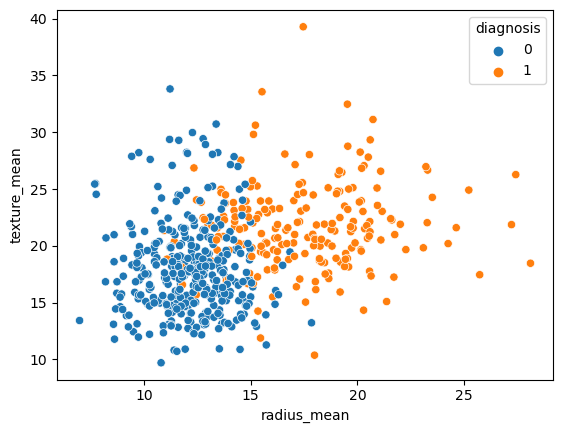

In [25]:
sns.scatterplot(x=data.radius_mean, y=data.texture_mean,hue=data.diagnosis)

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

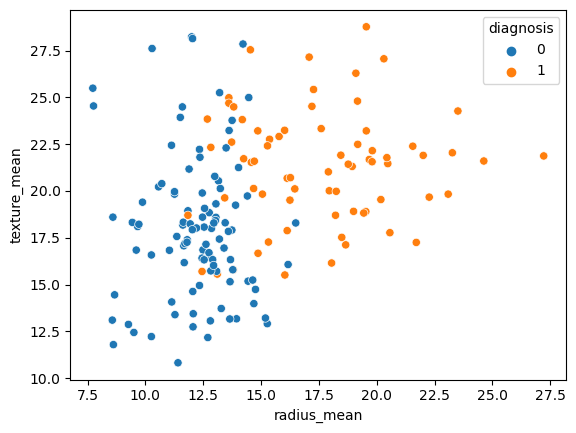

In [26]:
sns.scatterplot(x=test_x1.radius_mean, y=test_x1.texture_mean,hue=test_y1)

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

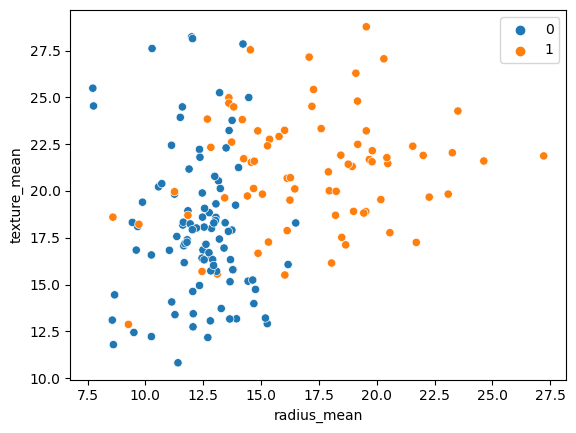

In [27]:
sns.scatterplot(x=test_x1.radius_mean, y=test_x1.texture_mean,hue=prediction)